In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
sheet_names = pd.ExcelFile("Assingment_Dataset.xlsx").sheet_names
print(sheet_names)
     

['Geospatial Data', 'Satellite Details', 'News Reports', 'Historical Incidents']


In [9]:
threat_assessment= pd.read_excel("Assingment_Dataset.xlsx", sheet_name='Historical Incidents')
     

In [10]:
threat_assessment.columns

Index(['Incident ID', 'Date', 'Location', 'Description', 'Outcome'], dtype='object')

In [11]:
threat_assessment.head()

,Incident ID,Date,Location,Description,Outcome
0,1,2022-01-10,Border Post Alpha,Clashes between patrol units of Country A and ...,Temporary ceasefire reached
1,2,2022-02-05,Border Post Bravo,Unconfirmed reports of border incursion,Investigation launched
2,3,2022-03-12,Border Post Charlie,Artillery fire exchanged between military units,Ceasefire negotiations initiated
3,4,2022-04-20,Border Post Delta,Civilians caught in crossfire during border sk...,Humanitarian aid dispatched
4,5,2022-05-25,Border Post Echo,Surveillance drones detected unauthorized move...,Increased border patrols


In [12]:
threat_assessment.tail(10)


,Incident ID,Date,Location,Description,Outcome
20,21,2023-11-12,Border Post Alpha,Military unit incursion reported,Heightened alert status
21,22,2023-12-08,Border Post Bravo,Accusations of border encroachment,Diplomatic protests and negotiations
22,23,2024-01-15,Border Post Charlie,Cross-border artillery attack,Ceasefire negotiations
23,24,2024-02-20,Border Post Delta,Increased troop movements detected,International scrutiny
24,25,2024-03-25,Border Post Echo,Incident involving border patrol clash,Emergency response and aid
25,26,2024-04-30,Border Post Alpha,Reports of sabotage of border facilities,Investigation launched
26,27,2024-05-20,Border Post Bravo,Exchange of fire involving local militias,Ceasefire agreement reached
27,28,2024-06-15,Border Post Charlie,Detection of increased military presence,Security measures intensified
28,29,2024-07-10,Border Post Delta,Border patrol clash with suspected infiltrators,Diplomatic discussions initiated
29,30,2024-08-01,Border Post Echo,Reports of unauthorized military movements,Surveillance increased


In [17]:
threat_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Incident ID  30 non-null     int64         
 1   Date         30 non-null     datetime64[ns]
 2   Location     30 non-null     object        
 3   Description  30 non-null     object        
 4   Outcome      30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.3+ KB


In [18]:

threat_assessment.describe()
     

,Incident ID,Date
count,30.000000,30
mean,15.500000,2023-05-12 12:00:00
min,1.000000,2022-01-10 00:00:00
25%,8.250000,2022-09-03 18:00:00
50%,15.500000,2023-06-12 00:00:00
75%,22.750000,2024-01-05 12:00:00
max,30.000000,2024-08-01 00:00:00
std,8.803408,NaN


In [19]:
print(threat_assessment.isnull().sum())
threat_assessment = threat_assessment.dropna()

Incident ID    0
Date           0
Location       0
Description    0
Outcome        0
dtype: int64


In [20]:
incident_counts = threat_assessment['Location'].value_counts()
incident_counts

Location
Border Post Alpha      6
Border Post Bravo      6
Border Post Charlie    6
Border Post Delta      6
Border Post Echo       6
Name: count, dtype: int64

In [21]:

location_time = threat_assessment.groupby(['Location', pd.Grouper(key='Date', freq='M')]).size().unstack(fill_value=0)
location_time

Date,2022-01-31,2022-06-30,2023-01-31,2023-06-30,2023-11-30,2024-04-30,2022-02-28,2022-07-31,2023-02-28,2023-07-31,...,2023-04-30,2023-09-30,2024-02-29,2024-07-31,2022-05-31,2022-10-31,2023-05-31,2023-10-31,2024-03-31,2024-08-31
Location,,,,,,,,,,,,,,,,,,,,,
Border Post Alpha,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Border Post Bravo,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Border Post Charlie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Border Post Delta,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
Border Post Echo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [22]:
recent_incidents = threat_assessment[threat_assessment['Date'] >= '2023-01-01']
recent_summary = recent_incidents.groupby(['Location', 'Description']).size().reset_index(name='Count')
recent_summary

,Location,Description,Count
0,Border Post Alpha,Increased surveillance detected near the border,1
1,Border Post Alpha,Incursion by armed groups detected,1
2,Border Post Alpha,Military unit incursion reported,1
3,Border Post Alpha,Reports of sabotage of border facilities,1
4,Border Post Bravo,Accusations of border encroachment,1
5,Border Post Bravo,Exchange of fire involving local militias,1
6,Border Post Bravo,Reports of infiltration attempts by cross-bord...,1
7,Border Post Bravo,Skirmish between local militias and border pat...,1
8,Border Post Charlie,Border skirmish involving artillery fire,1
9,Border Post Charlie,Cross-border artillery attack,1


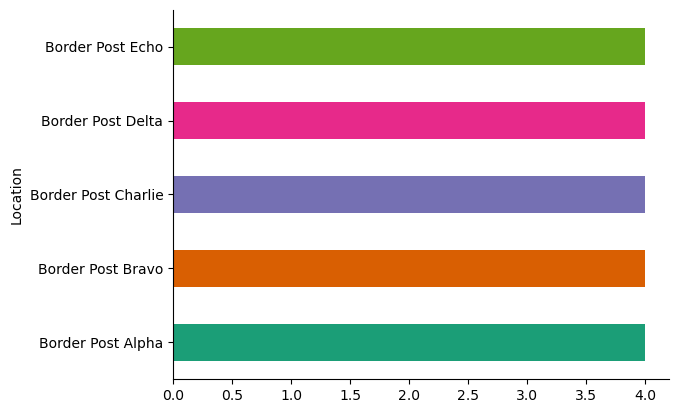

In [23]:

recent_summary.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Location
Border Post Alpha      6
Border Post Bravo      6
Border Post Charlie    6
Border Post Delta      6
Border Post Echo       6
Name: count, dtype: int64


<Axes: title={'center': 'Incident Frequency by Border Post'}, xlabel='Location'>

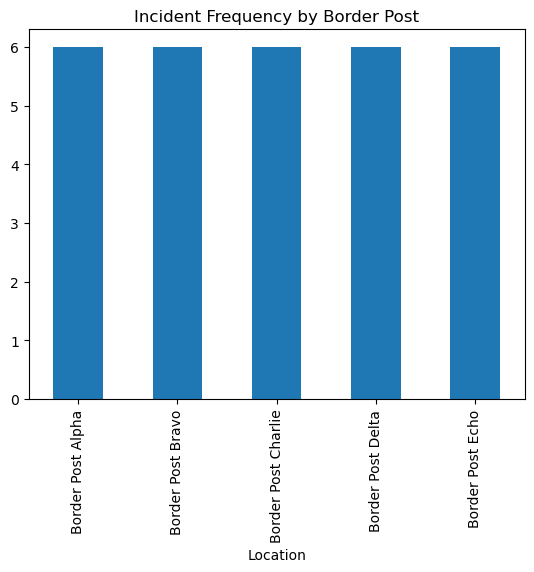

In [25]:
incident_frequency = threat_assessment['Location'].value_counts()

print(incident_frequency)


incident_frequency.plot(kind='bar', title='Incident Frequency by Border Post')

YearMonth
2022-01    1
2022-02    1
2022-03    1
2022-04    1
2022-05    1
2022-06    1
2022-07    1
2022-08    1
2022-09    1
2022-10    1
2023-01    1
2023-02    1
2023-03    1
2023-04    1
2023-05    1
2023-06    1
2023-07    1
2023-08    1
2023-09    1
2023-10    1
2023-11    1
2023-12    1
2024-01    1
2024-02    1
2024-03    1
2024-04    1
2024-05    1
2024-06    1
2024-07    1
2024-08    1
Freq: M, dtype: int64


<Axes: title={'center': 'Incident Trends Over Time'}, xlabel='YearMonth'>

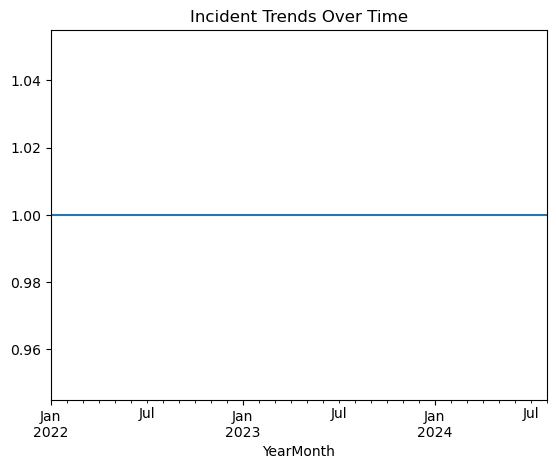

In [26]:
threat_assessment['YearMonth'] = threat_assessment['Date'].dt.to_period('M')

incident_trends = threat_assessment.groupby('YearMonth').size()

print(incident_trends)

# Plotting the trends
incident_trends.plot(kind='line', title='Incident Trends Over Time')

Description
Clashes between patrol units of Country A and Country B       1
Unconfirmed reports of border incursion                       1
Border patrol clash with suspected infiltrators               1
Detection of increased military presence                      1
Exchange of fire involving local militias                     1
Reports of sabotage of border facilities                      1
Incident involving border patrol clash                        1
Increased troop movements detected                            1
Cross-border artillery attack                                 1
Accusations of border encroachment                            1
Military unit incursion reported                              1
Reports of military exchanges                                 1
Detection of unauthorized drone activity                      1
Border skirmish involving artillery fire                      1
Reports of infiltration attempts by cross-border smugglers    1
Increased surveillance detec

<Axes: title={'center': 'Incident Outcomes'}, ylabel='Outcome'>

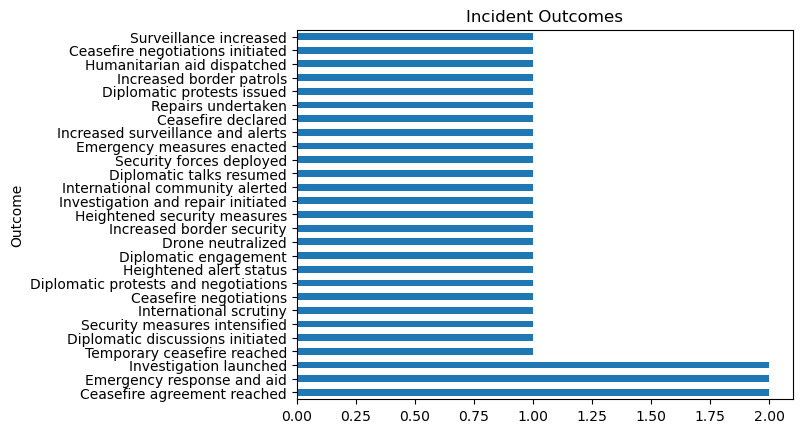

In [27]:
incident_type_count = threat_assessment['Description'].value_counts()

print(incident_type_count)


incident_outcome_count = threat_assessment['Outcome'].value_counts()

print(incident_outcome_count)


incident_type_count.plot(kind='barh', title='Incident Types')
incident_outcome_count.plot(kind='barh', title='Incident Outcomes')


Description          Accusations of border encroachment  \
Location                                                  
Border Post Alpha                                     0   
Border Post Bravo                                     1   
Border Post Charlie                                   0   
Border Post Delta                                     0   
Border Post Echo                                      0   

Description          Alleged sabotage of border security infrastructure  \
Location                                                                  
Border Post Alpha                                                    0    
Border Post Bravo                                                    1    
Border Post Charlie                                                  0    
Border Post Delta                                                    0    
Border Post Echo                                                     0    

Description          Artillery fire exchanged between milita

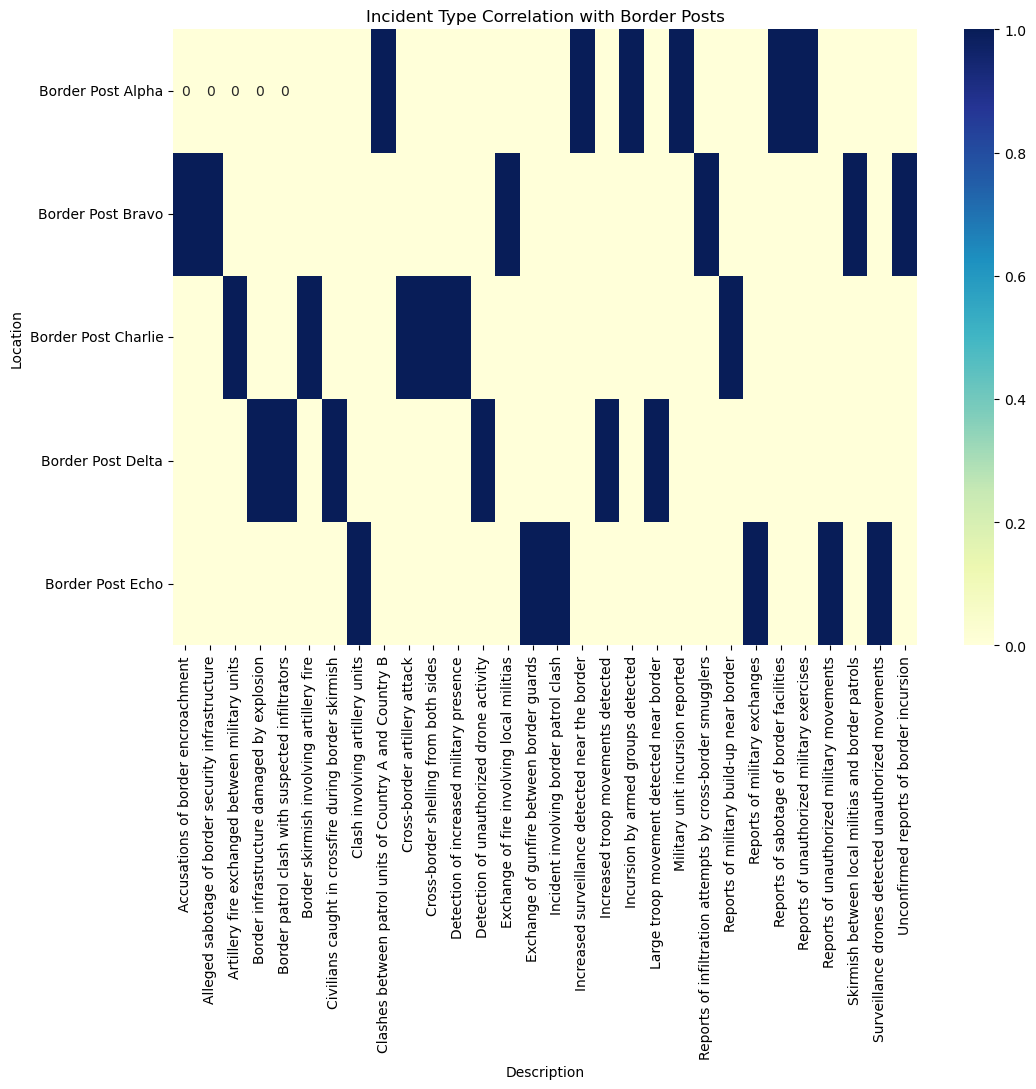

In [28]:
incident_correlation = threat_assessment.pivot_table(index='Location', columns='Description', aggfunc='size', fill_value=0)

print(incident_correlation)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(incident_correlation, annot=True, cmap="YlGnBu")
plt.title('Incident Type Correlation with Border Posts')
plt.show()